In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/Users/charan/Desktop/projects/Isolation_Forest_Gradious/industrial_sensor_data.csv')

In [2]:
df.head(5)

,SensorID,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours,LastServiceDate,FaultFlag
0,1.0,46.835910,35.271635,6.482570,83.950461,65.776326,249.835122,1291.381337,01-01-2023,1.0
1,2.0,95.810716,40.850663,1.723864,56.775234,8.923224,373.373386,804.836988,01-01-2023,1.0
2,3.0,77.219485,16.271055,8.723946,70.743719,24.990651,281.333390,943.818220,01-01-2023,0.0
3,4.0,65.885971,33.119334,6.131162,50.523381,77.594255,41.651292,1433.449565,01-01-2023,1.0
4,5.0,28.261584,30.728569,1.572039,64.102420,53.339900,92.790118,1752.612059,01-01-2023,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SensorID          2961 non-null   float64
 1   Temperature       2956 non-null   float64
 2   Pressure          2957 non-null   float64
 3   Vibration         2963 non-null   float64
 4   Humidity          2940 non-null   float64
 5   FlowRate          2950 non-null   float64
 6   PowerConsumption  2951 non-null   float64
 7   RuntimeHours      2950 non-null   float64
 8   LastServiceDate   2963 non-null   object 
 9   FaultFlag         2961 non-null   float64
dtypes: float64(9), object(1)
memory usage: 234.5+ KB


In [4]:
df.describe()

,SensorID,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours,FaultFlag
count,2961.000000,2956.000000,2957.000000,2963.000000,2940.000000,2950.000000,2951.000000,2950.000000,2961.000000
mean,1501.459980,57.518996,27.264741,4.870192,55.233080,50.347024,251.597385,1026.234582,0.475853
std,866.231044,24.804491,12.912198,2.856677,20.185838,28.678601,143.456159,577.568918,0.499501
min,1.000000,15.000989,5.001382,0.002410,20.003698,1.119158,0.126227,1.223270,0.000000
25%,750.000000,35.934731,16.108566,2.411203,37.791806,25.213703,128.844111,541.601652,0.000000
50%,1505.000000,57.999008,26.982303,4.823562,55.088066,49.586545,255.759779,1020.800311,0.000000
75%,2252.000000,79.234856,38.207793,7.287428,72.945778,75.982937,373.169711,1521.777929,1.000000
max,3000.000000,99.976002,49.980097,9.994607,89.977124,99.980709,499.962413,1999.742877,1.000000


In [5]:
df.isnull().sum()

SensorID            39
Temperature         44
Pressure            43
Vibration           37
Humidity            60
FlowRate            50
PowerConsumption    49
RuntimeHours        50
LastServiceDate     37
FaultFlag           39
dtype: int64

In [6]:
num_cols=['Temperature','Pressure','Vibration','Humidity','FlowRate','PowerConsumption','RuntimeHours']

for i in num_cols:
  col_median=df[i].median()
  df[i].fillna(col_median,inplace=True)

/var/folders/6k/c1n7cdsj01s53z3r1yt8h3nw0000gn/T/ipykernel_38276/1266960131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(col_median,inplace=True)
/var/folders/6k/c1n7cdsj01s53z3r1yt8h3nw0000gn/T/ipykernel_38276/1266960131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [7]:
df.isnull().sum()

SensorID            39
Temperature          0
Pressure             0
Vibration            0
Humidity             0
FlowRate             0
PowerConsumption     0
RuntimeHours         0
LastServiceDate     37
FaultFlag           39
dtype: int64

In [8]:
cat_cols=['SensorID','LastServiceDate','FaultFlag']

for i in cat_cols:
  col_mode=df[i].mode()[0]
  df[i].fillna(col_mode,inplace=True)

/var/folders/6k/c1n7cdsj01s53z3r1yt8h3nw0000gn/T/ipykernel_38276/1484058894.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(col_mode,inplace=True)


In [9]:
df.isnull().sum()
#All Missing values are dealt with!!

SensorID            0
Temperature         0
Pressure            0
Vibration           0
Humidity            0
FlowRate            0
PowerConsumption    0
RuntimeHours        0
LastServiceDate     0
FaultFlag           0
dtype: int64

In [10]:
today_date=pd.to_datetime('today')

df['LastServiceDate']=pd.to_datetime(df['LastServiceDate'],format='%d-%m-%Y')
df['DateTillNow']=(today_date-df['LastServiceDate']).dt.days

In [11]:
print(df['DateTillNow'])

#The output shows that the column is transformed into numerical column

0       1031
1       1031
2       1031
3       1031
4       1031
        ... 
2995     907
2996     907
2997     907
2998     907
2999     907
Name: DateTillNow, Length: 3000, dtype: int64


In [12]:
num_cols=['Temperature','Pressure','Vibration','Humidity','FlowRate','PowerConsumption','RuntimeHours','DateTillNow']
from sklearn.preprocessing import MinMaxScaler
X=df[num_cols]
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)



In [13]:
df.head()

,SensorID,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours,LastServiceDate,FaultFlag,DateTillNow
0,1.0,46.835910,35.271635,6.482570,83.950461,65.776326,249.835122,1291.381337,2023-01-01,1.0,1031
1,2.0,95.810716,40.850663,1.723864,56.775234,8.923224,373.373386,804.836988,2023-01-01,1.0,1031
2,3.0,77.219485,16.271055,8.723946,70.743719,24.990651,281.333390,943.818220,2023-01-01,0.0,1031
3,4.0,65.885971,33.119334,6.131162,50.523381,77.594255,41.651292,1433.449565,2023-01-01,1.0,1031
4,5.0,28.261584,30.728569,1.572039,64.102420,53.339900,92.790118,1752.612059,2023-01-01,1.0,1031


In [14]:
#Since sensor ID is just to mention the number or s.no I will remove it from my dataset to put to the isolation forest model

print(X_scaled)

[[0.37463861 0.67299061 0.64852201 ... 0.49958147 0.64555687 1.        ]
 [0.95098222 0.79702768 0.17227979 ... 0.74673897 0.4021045  1.        ]
 [0.73219754 0.2505557  0.87283465 ... 0.56259865 0.47164659 1.        ]
 ...
 [0.30986731 0.76548021 0.97823515 ... 0.72567715 0.31328116 0.        ]
 [0.29011918 0.48548956 0.10776764 ... 0.69200496 0.45381782 0.        ]
 [0.87165863 0.1494216  0.93243073 ... 0.82155657 0.42845625 0.        ]]


In [15]:
print(df['FaultFlag'].value_counts())


# From here I found that there are 47% of the fault values in the entire dataset and hence this will determine
# the contamination value in the model.

FaultFlag
0.0    1591
1.0    1409
Name: count, dtype: int64


In [16]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest(n_estimators=100,contamination=0.47)
pred=iso.fit_predict(X_scaled)

df['Anamoly ?']=pred
df.head()

,SensorID,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours,LastServiceDate,FaultFlag,DateTillNow,Anamoly ?
0,1.0,46.835910,35.271635,6.482570,83.950461,65.776326,249.835122,1291.381337,2023-01-01,1.0,1031,1
1,2.0,95.810716,40.850663,1.723864,56.775234,8.923224,373.373386,804.836988,2023-01-01,1.0,1031,-1
2,3.0,77.219485,16.271055,8.723946,70.743719,24.990651,281.333390,943.818220,2023-01-01,0.0,1031,1
3,4.0,65.885971,33.119334,6.131162,50.523381,77.594255,41.651292,1433.449565,2023-01-01,1.0,1031,1
4,5.0,28.261584,30.728569,1.572039,64.102420,53.339900,92.790118,1752.612059,2023-01-01,1.0,1031,-1


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(classification_report(df['FaultFlag'],df['Anamoly ?']))


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      1591
         1.0       0.48      0.55      0.51      1409

    accuracy                           0.26      3000
   macro avg       0.16      0.18      0.17      3000
weighted avg       0.23      0.26      0.24      3000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [18]:
print(confusion_matrix(df['FaultFlag'],df['Anamoly ?']))
print(accuracy_score(df['FaultFlag'],df['Anamoly ?']))

[[  0   0   0]
 [769   0 822]
 [641   0 768]]
0.256


In [19]:
#I understood that the poor accuracy is because of not mapping the anamoly prediction which
#are (1,-1) to the fault flag values of (1,0)

y_pred=df['Anamoly ?'].map({1:0,-1:1})
print(classification_report(df['FaultFlag'], y_pred, target_names=['Normal (0.0)', 'Fault (1.0)']))

              precision    recall  f1-score   support

Normal (0.0)       0.52      0.52      0.52      1591
 Fault (1.0)       0.45      0.45      0.45      1409

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



<Axes: xlabel='Temperature', ylabel='Vibration'>

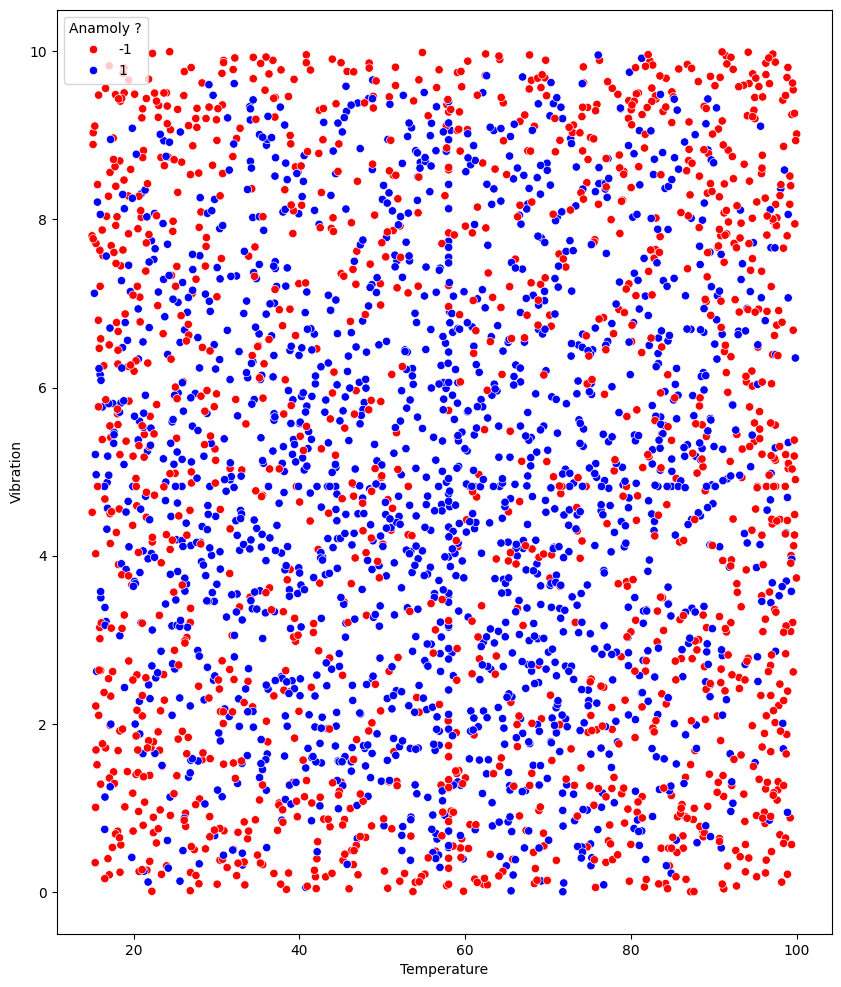

In [20]:
plt.figure(figsize=(10,12))

sns.scatterplot(data=df,x="Temperature",y='Vibration',hue='Anamoly ?',palette={1:'blue',-1:"red"})



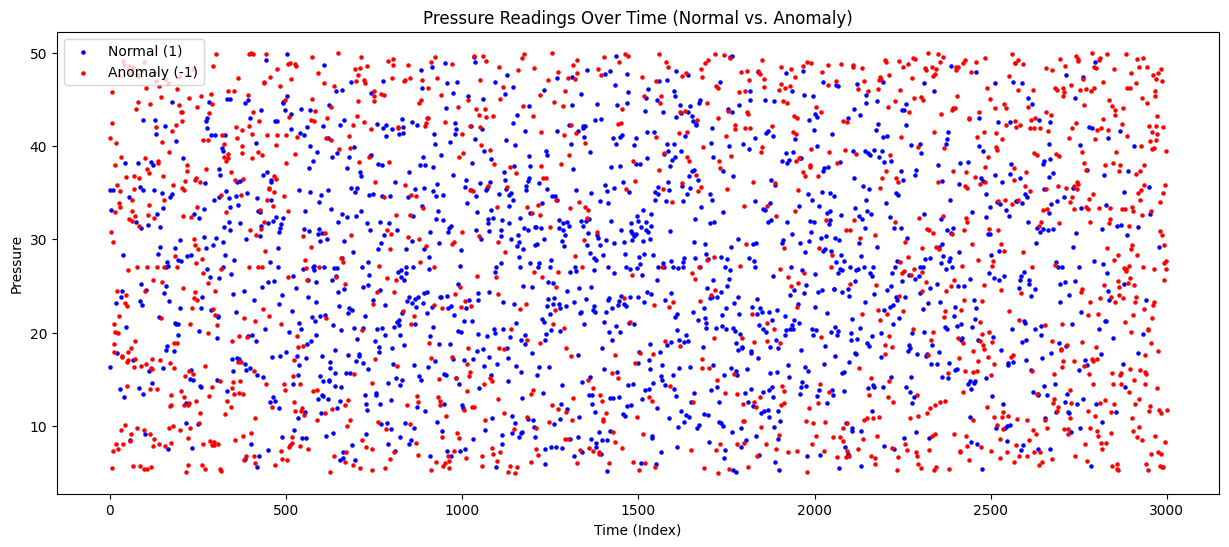

In [21]:
# Creating the time-series plot

normal = df[df['Anamoly ?'] == 1]
anamolies = df[df['Anamoly ?'] == -1]


plt.figure(figsize=(15, 6))


plt.scatter(normal.index, normal['Pressure'],
            color='blue',
            label='Normal (1)',
            s=5)


plt.scatter(anamolies.index, anamolies['Pressure'],
            color='red',
            label='Anomaly (-1)',
            s=5)


plt.title("Pressure Readings Over Time (Normal vs. Anomaly)")
plt.xlabel("Time (Index)")
plt.ylabel("Pressure")
plt.legend()
plt.show()